# 딥러닝을 이용한 자연어 처리 입문 
* 저자: 유원준
[위키독스| 딥러닝을 이용한 자연어처리 입문](https://wikidocs.net/book/2155)

# 자연어 처리란

* 자연어: 일상에서 사용하는 언어 
    - 자연어 처리란 자연어의 의미를 분석하여 컴퓨터가 처리할 수 있도록 만드는 과정을 의미한다.  
* 활용 영역
    - 음성인식
    - 내용 요약
    - 번역
    - 사용자의 감성 분석 
    - 텍스트 분류(스펨/햄 메일 분류 or 뉴스기사 카테고리 분류...) 

# 텍스트 전처리(Text Preprocessing) 
* 자연어 처리에 있어 가장 중요한 작업
* 모형의 정확한 학습을 위해 입력 데이터를 적절히 처리해 줄 필요가 있다. 
* 자연어 처리에서 크롤링 등으로 얻어낸 코퍼스 데이터가 필요에 맞게 전처리되지 않은 상태라면-> 해당 데이터를 사용하고자하는 용도에 맞게 토큰화(tokenization) -> 정제(cleaning) -> 정규화(normalization)하는 일을 하게 됩니다. 

## Tokenization
* 주어진 corpus(말뭉치)에서 token(토큰)이라는 단위로 변환하는 과정 
* '토큰' 의 단위는 상황마다 다름. 보통은 의미를 가진 가장 작은 단위를 토큰이라 부름

### word Tokenization (단어 토큰화) 
* 토큰의 기준에 따른 분류 
    - 단어 토큰화: 토큰의 기준을 단어로 하는 경우 
    - 단어구 토큰화: 
    - 문장 토큰화 
    - etc.

In [5]:
# 가장 단순한 예시 
sentence = "Time is an illusion, Lunchtime double so."
sentence.split(" ")

['Time', 'is', 'an', 'illusion,', 'Lunchtime', 'double', 'so.']

In [9]:
from nltk.tokenize import word_tokenize

result = word_tokenize(sentence)
print(result)

['Time', 'is', 'an', 'illusion', ',', 'Lunchtime', 'double', 'so', '.']


* 위의 예시처럼, 토큰화의 가장 단순한 방식은 단순히 띄어쓰기를 기준으로 단어를 나누고, 이후 구두점과 특수 문자를 제외함으로써 가능합니다. 
* 하지만, 다양한 예외사항이 있기 때문에, 해당 방식으로의 토큰화보다 더 정교한 토큰화 방식이 필요합니다. 
* 예를들어, 영어의 경우 어퍼스트로피 등과 같이 다양한 예외사항이 존재하며, 한국어의 경우 더욱 복잡한 문제가 존재합니다. 

#### 토큰화 - 예외처리에 대한 고민 
* 토큰화를 진행하면서 발생하는 다양한 예외에 대한 고민을 할 필요성이 있다. 
* 보통 분석의 목적에 맞게 해당 데이터를 처리하는것이 좋다. 

* 아포스트로피 문제의 해결 
* ex) Don't be fooled by the dark sounding name, Mr. Jone's Orphanage is as cheery as cheery goes for a pastry shop.
    - Don't
    - Don t
    - Dont
    - Do n't
    - Jone's
    - Jone s
    - Jone
    - Jones
* 이와 같이 단순히 특수문자를 제거할 경우 의미상의 문제 발생 가능성이 높아집니다.
* 해당 경우, 정규표현식을 활용해 자신만의 기준으로 토큰화 방식을 지정할 수 있지만, 이미 해당 목적에 맞게 설계된 모형이 있는경우, 해당 모형을 활용해 전처리를 진행할 수도 있습니다. 
    - 영어 문자 토큰화를 진행하기 위해 구성되어 있는 NLTK의 word_torkenize와 WordPuntTokenizer을 사용해 토큰화 진행 방식을 살펴보겠습니다.

In [10]:
from nltk.tokenize import word_tokenize
sentence = "Don't be fooled by the dark sounding name, Mr. Jone's Orphanage is as cheery as cheery goes for a pastry shop."

print(word_tokenize(sentence))  

['Do', "n't", 'be', 'fooled', 'by', 'the', 'dark', 'sounding', 'name', ',', 'Mr.', 'Jone', "'s", 'Orphanage', 'is', 'as', 'cheery', 'as', 'cheery', 'goes', 'for', 'a', 'pastry', 'shop', '.']


word_tokenize는 Don't를 Do와 n't로 분리하였으며, 반면 Jone's는 Jone과 's로 분리한 것을 확인할 수 있습니다.

In [11]:
from nltk.tokenize import wordpunct_tokenize
print(wordpunct_tokenize(sentence))

['Don', "'", 't', 'be', 'fooled', 'by', 'the', 'dark', 'sounding', 'name', ',', 'Mr', '.', 'Jone', "'", 's', 'Orphanage', 'is', 'as', 'cheery', 'as', 'cheery', 'goes', 'for', 'a', 'pastry', 'shop', '.']


WordPunctTokenizer는 구두점을 별도로 분류하는 특징을 갖고 있기때문에, 앞서 확인했던 word_tokenize와는 달리 Don't를 Don과 '와 t로 분리하였으며, 이와 마찬가지로 Jone's를 Jone과 '와 s로 분리한 것을 확인할 수 있습니다.

In [12]:
# keras 지원 토큰화 도구 이용 
from tensorflow.keras.preprocessing.text import text_to_word_sequence 
print(text_to_word_sequence(sentence))

["don't", 'be', 'fooled', 'by', 'the', 'dark', 'sounding', 'name', 'mr', "jone's", 'orphanage', 'is', 'as', 'cheery', 'as', 'cheery', 'goes', 'for', 'a', 'pastry', 'shop']


케라스의 text_to_word_sequence는 기본적으로 모든 알파벳을 소문자로 바꾸면서 마침표나 컴마, 느낌표 등의 구두점을 제거합니다. 하지만 don't나 jone's와 같은 경우 아포스트로피는 보존하는 것을 볼 수 있습니다.

#### 토큰화에서 고려할 사항

1) 구두점이나 특수문자를 단순히 제외해서는 안된다.   
2) 줄임말과 단어 내에 띄어쓰기가 있는경우. 

### 문장 토큰화
- 내용 읽고 넘어감

### 토큰화를 위한 이진 분류기 (영문 기준) 
* 문장의 토큰화에서의 예외사항을 발생시키는 마침표의 처리를 위해 입력에 따라 두개의 클래스로 분류하는 이진분류기를 활용하기도 함. 
  
* case 
    1. 마침표(.)가 단어의 일부로 사용되며, 약어(abbreivation)로 사용되는 경우  
    2. 마침표가 구분자로써 사용되는 경우  
* 방안 
    1. 머신러닝 모형을 활용  -> 약어에 대한 정보를 담고 있는 '약어사전'을 활용하기도 함  
    2. 직접 코딩  

### 한국어 토큰화의 어려움

1. **조사의 처리**: 조사에 따라 단어의 의미가 완전히 달라진다. 이로 인해 같은 단어를 다른 단어로 인식될 경우, 자연어 처리 과정에서 문제 발생 가능성이 높아진다.따라서, 한국어 자연어 처리에서는 조사를 분리해줄 필요가 있다.

* **형태소 단위의 토큰화 필요성** 
    - 형태소(morpheme)란 뜻을 가진 가장 작은 말의 단위 
    - **의존형태소**와 **자립형태소**로 나뉜다. 
    - **의존형태소**: 다른 형태소와 결합되어 사용도는 형태소. (접사, 어미, 조사,어간) 
    - **자립형태소**: 접사, 어미, 조사와 상관없이 자립하여 사용될 수 있는 형태소. 그 자체로 단어가 된다. (체언(명사/대명사/수사), 수식언(관형사, 부사), 감탄사 등.)

2. 한국어는 띄어쓰기가 영어보다 잘 지켜지지 않음

### 품사 테깅(Part-of-speech tagging) 
* 같은 형태의 단어라도 품사에 따라 의미가 달라지기도 합니다.

#### 영어의 경우(실습) 

In [15]:
from nltk.tokenize import word_tokenize
text = "I am actively looking for ph.D. students. and you are a ph.D. student."

tokenized_sentence = word_tokenize(text)
tokenized_sentence

['I',
 'am',
 'actively',
 'looking',
 'for',
 'ph.D.',
 'students',
 '.',
 'and',
 'you',
 'are',
 'a',
 'ph.D.',
 'student',
 '.']

In [18]:
# 품사 테깅
# pos_tag를 활용 
from nltk.tag import pos_tag
taged_sentence = pos_tag(tokenized_sentence)
taged_sentence

[('I', 'PRP'),
 ('am', 'VBP'),
 ('actively', 'RB'),
 ('looking', 'VBG'),
 ('for', 'IN'),
 ('ph.D.', 'JJ'),
 ('students', 'NNS'),
 ('.', '.'),
 ('and', 'CC'),
 ('you', 'PRP'),
 ('are', 'VBP'),
 ('a', 'DT'),
 ('ph.D.', 'JJ'),
 ('student', 'NN'),
 ('.', '.')]

Penn Treebank POG Tags에서 PRP는 인칭 대명사, VBP는 동사, RB는 부사, VBG는 현재부사, IN은 전치사, NNP는 고유 명사, NNS는 복수형 명사, CC는 접속사, DT는 관사를 의미합니다.

#### 한국어의 경우(실습) 

한국어 자연어 처리를 위해서는 KoNLPy("코엔엘파이"라고 읽습니다)라는 파이썬 패키지를 사용할 수 있습니다. 코엔엘파이를 통해서 사용할 수 있는 형태소 분석기로 Okt(Open Korea Text), 메캅(Mecab), 코모란(Komoran), 한나눔(Hannanum), 꼬꼬마(Kkma)가 있습니다.  
  
한국어 NLP에서 형태소 분석기를 사용한다는 것은 단어 토큰화가 아니라 정확히는 형태소(morpheme) 단위로 형태소 토큰화(morpheme tokenization)를 수행하게 됨을 뜻합니다. 여기선 이 중에서 Okt와 꼬꼬마를 통해서 토큰화를 수행해보도록 하겠습니다. (Okt는 기존에는 Twitter라는 이름을 갖고있었으나 0.5.0 버전부터 이름이 변경되어 인터넷에는 아직 Twitter로 많이 알려져있으므로 학습 시 참고바랍니다.)

##### OKT: open korean text

In [22]:
from konlpy.tag import Okt 

sentence = "열심히 코딩한 당신, 연휴에는 여행을 가봐요!"

okt = Okt()

tokenized_sentence = okt.morphs(sentence)
tokenized_sentence

['열심히', '코딩', '한', '당신', ',', '연휴', '에는', '여행', '을', '가봐요', '!']

In [23]:
# 품사 테깅 
taged_sentence = okt.pos(sentence)
taged_sentence

[('열심히', 'Adverb'),
 ('코딩', 'Noun'),
 ('한', 'Josa'),
 ('당신', 'Noun'),
 (',', 'Punctuation'),
 ('연휴', 'Noun'),
 ('에는', 'Josa'),
 ('여행', 'Noun'),
 ('을', 'Josa'),
 ('가봐요', 'Verb'),
 ('!', 'Punctuation')]

In [24]:
# 명사 추출기 
nouns = okt.nouns(sentence)
nouns

['코딩', '당신', '연휴', '여행']

1) morphs : 형태소 추출  
2) pos : 품사 태깅(Part-of-speech tagging)  
3) nouns : 명사 추출  
  
- 주의! 각각의 도구들은 원문을 입력으로 제공해야 한다. 

##### kkma: 꼬꼬마 활용

In [26]:
from konlpy.tag import Kkma
sentence = "열심히 코딩한 당신, 연휴에는 여행을 가봐요!"

kkma = Kkma()
morphs = kkma.morphs(sentence)
morphs

['열심히', '코딩', '하', 'ㄴ', '당신', ',', '연휴', '에', '는', '여행', '을', '가보', '아요', '!']

In [27]:
# 품사 테깅 
pos = kkma.pos(sentence)
pos

[('열심히', 'MAG'),
 ('코딩', 'NNG'),
 ('하', 'XSV'),
 ('ㄴ', 'ETD'),
 ('당신', 'NP'),
 (',', 'SP'),
 ('연휴', 'NNG'),
 ('에', 'JKM'),
 ('는', 'JX'),
 ('여행', 'NNG'),
 ('을', 'JKO'),
 ('가보', 'VV'),
 ('아요', 'EFN'),
 ('!', 'SF')]

In [28]:
nouns = kkma.nouns(sentence)
nouns

['코딩', '당신', '연휴', '여행']

앞서 사용한 Okt 형태소 분석기와 결과가 다른 것을 볼 수 있습니다. 각 형태소 분석기는 성능과 결과가 다르게 나오기 때문에, 형태소 분석기의 선택은 사용하고자 하는 필요 용도에 어떤 형태소 분석기가 가장 적절한지를 판단하고 사용하면 됩니다. 예를 들어서 속도를 중시한다면 메캅을 사용할 수 있습니다.

## cleaning and Normalization
* **토큰화**: 코퍼스에서 용도에 맞게 토큰을 분류하는 작업 
* **정제 및 정규화**: 토큰화 작업 전후로 텍스트 데이터를 용도에 맞게 처리하는 과정
    - **정제(cleaning)**: 갖고있는 코퍼스로부터 노이즈 데이터를 제거 하는 과정 
    - **정규화(normalization)**: 표현 방법이 다른 단어들을 통합시켜 같은 형태의 단어로 만드는 과정 

정제 작업은 토큰화 작업에 방해가 되는 부분들을 배제시키고 토큰화 작업을 수행하기 위해서 토큰화 작업보다 앞서 이루어지기도 하지만, 토큰화 작업 이후에도 여전히 남아있는 노이즈들을 제거하기위해 지속적으로 이루어지기도 합니다. 사실 완벽한 정제 작업은 어려운 편이라서, 대부분의 경우 이 정도면 됐다.라는 일종의 합의점을 찾기도 합니다.

### 규칙에 기반한 표기가 다른 단어들의 통합
* 표기가 다른 여러 단어들을 하나의 단어로 정규화   
ex) US == USA / ROK == Korea ...   
* 방법론 
    - **어간추출(stemming)**
    - **표제어 추출(lemmatization)**

### 대/소문자 통합 
* 읽어보기

### 불필요한 단어의 제거
* 노이즈 데이터 : 자연어가 아니면서 아무런 의미도 갖지 않는 단어 뿐만 아니라, 분석 목적에 맞지 않는 불필요한 단어를 의미하기도 함 

#### 등장 빈도가 적은 단어
* 대규모의 데이터에서 등장 빈도가 너무 낮은 단어는 학습에 도움이 되지 않습니다. 과감히 제거. 

#### 길이가 짧은 단어 
* 영어의 경우 중요한 단어일수록 단어의 길이가 길어지는 특성 
* 하지만, 킹국어는 한자어의 존재가 다수 있기 때문에, 길이가 짧은 단어도 중요한 의미를 내포하기도 합니다. 

### Regular Expression 
* 크롤러가 수집한 웹 소스 기반 코퍼스 데이터는 종종 의미 없는 형식의 단어들이 반복적으로 존재할 가능성이 높습니다. 

## 어간추출(Stemming) and 표제어 추출(Lemmatization)
* **공통 목적**: 코퍼스에 있는 단어의 개수를 줄일 수 있는 기법  
  
특히, 자연어 처리에서 주로 사용되는 기법인 Bag of Word(단어의 빈도수를 기반으로 문제를 해결)에서 형태가 다른 언어들을 하나의 단어로 일반화시켜 문서 내의 단어 수를 줄임과 동시에 보다 정확한 기준으로 단어를 카운팅스타 하겠다는 의미  
  
공통적으로 코퍼스의 복잡성을 줄이는 방향으로 진행 


### 표제어 추출(Lemmatization)- 영문 
* **표제어(Lemma)** : 표제어 또는 '기본 사전형 단어'정도의 의미 
* 표제어 추출은 단어들로 부터 표제어를 찾아가는 과정을 의미한다.  
    ex) am/are/is --> be   
    
    
* 형태소의 분류 
    - **어간(stem)**: 단어의 의미를 담고 있는 핵심부분 
    - **접사(affix)**: 단어에 추가적인 의미를 주는 부분 
  
  
* **형태학적 파싱**: 어간과 접사를 분리해 내는 작업  
    ex) cats = cat(어간) + -s(접사) 


#### NLTK의 표제어 추출
* WordNetLemmarizer

In [31]:
from nltk.stem import WordNetLemmatizer

words = ['policy', 'doing', 'organization', 
         'have', 'going', 'love', 'lives', 'fly', 
         'dies', 'watched', 'has', 'starting']

lemmatizer = WordNetLemmatizer()

lemmatized = [lemmatizer.lemmatize(word) for word in words]
lemmatized

['policy',
 'doing',
 'organization',
 'have',
 'going',
 'love',
 'life',
 'fly',
 'dy',
 'watched',
 'ha',
 'starting']

위의 결과를 확인하면, ha와 dy와 같이 부적절한 형태로 출력되는 결과를 볼 수 있다. 이는 표제어추출기에 단어의 품사에 대한 정보를 제공하지 않았기 때문입니다.  

WordNetLemmatizer는 입력으로 단어가 동사 품사라는 사실을 알려줄 수 있습니다. 즉, dies와 watched, has가 문장에서 동사로 쓰였다는 것을 알려준다면 표제어 추출기는 품사의 정보를 보존하면서 정확한 Lemma를 출력하게 됩니다.

In [32]:
lemmatizer.lemmatize('dies', 'v')

'die'

In [33]:
lemmatizer.lemmatize('watched', 'v')

'watch'

In [34]:
lemmatizer.lemmatize('has', 'v')

'have'

어간 추출에 대해서 언급하기에 앞서, 표제어 추출과 어간 추출의 차이에 대해 미리 언급하고자 합니다. 표제어 추출은 문맥을 고려하며, 수행했을 때의 결과는 해당 단어의 품사 정보를 보존합니다. (POS 태그를 보존한다고도 말할 수 있습니다.)

하지만, 어간 추출을 수행한 결과는 품사 정보가 보존되지 않습니다. (다시 말해 POS 태그를 고려하지 않습니다.) 더 정확히는, 어간 추출을 한 결과는 사전에 존재하지 않는 단어일 경우가 많습니다.

### 어간 추출(Stemming) - 영문

**표제어 추출 VS 어간추출** 
* 표제어 추출은 문맥을 고려하며, 수행했을때의 결과는 해당 단어의 품사정보를 보존합니다.(Pos tag를 보존한다.)
* 어간 추출은 품사정보가 보존되지 않는다. 즉, 어간 추출을 한 결과는 사전에 존재하지 않는 단어일 경우가 많다.  

**어간 추출**   
:형태학적 분석을 단순화한 버전이라고 볼 수 있다. 정해진 규칙만을 고려해 단어의 어미를 자르는 어림짐작의 작업이라 할 수 있다.  

In [35]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
stemmer = PorterStemmer()
text = "This was not the map we found in Billy Bones's chest, but an accurate copy, complete in all things--names and heights and soundings--with the single exception of the red crosses and the written notes."
words = word_tokenize(text)
print(words)

['This', 'was', 'not', 'the', 'map', 'we', 'found', 'in', 'Billy', 'Bones', "'s", 'chest', ',', 'but', 'an', 'accurate', 'copy', ',', 'complete', 'in', 'all', 'things', '--', 'names', 'and', 'heights', 'and', 'soundings', '--', 'with', 'the', 'single', 'exception', 'of', 'the', 'red', 'crosses', 'and', 'the', 'written', 'notes', '.']


In [36]:
print([stemmer.stem(w) for w in words])

['thi', 'wa', 'not', 'the', 'map', 'we', 'found', 'in', 'billi', 'bone', "'s", 'chest', ',', 'but', 'an', 'accur', 'copi', ',', 'complet', 'in', 'all', 'thing', '--', 'name', 'and', 'height', 'and', 'sound', '--', 'with', 'the', 'singl', 'except', 'of', 'the', 'red', 'cross', 'and', 'the', 'written', 'note', '.']


위의 알고리즘의 결과에는 사전에 없는 단어들도 포함되어 있습니다. 위의 어간 추출은 단순 규칙에 기반하여 이루어지기 때문입니다.
  
  
가령, 포터 알고리즘의 어간 추출은 이러한 규칙들을 가집니다.  
ALIZE → AL  
ANCE → 제거  
ICAL → IC  

In [37]:
words = ['formalize', 'allowance', 'electricical']
print([stemmer.stem(w) for w in words])

['formal', 'allow', 'electric']


어간 추출 속도는 표제어 추출보다 일반적으로 빠른데, 포터 어간 추출기는 정밀하게 설계되어 정확도가 높으므로 영어 자연어 처리에서 어간 추출을 하고자 한다면 가장 준수한 선택입니다. NLTK에서는 포터 알고리즘 외에도 랭커스터 스태머(Lancaster Stemmer) 알고리즘을 지원합니다. 이번에는 포터 알고리즘과 랭커스터 스태머 알고리즘으로 각각 어간 추출을 진행했을 때, 이 둘의 결과를 비교해보도록 하겠습니다.

In [38]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
words = ['policy', 'doing', 'organization', 'have', 'going', 'love', 'lives', 'fly', 'dies', 'watched', 'has', 'starting']
print([stemmer.stem(w) for w in words])

['polici', 'do', 'organ', 'have', 'go', 'love', 'live', 'fli', 'die', 'watch', 'ha', 'start']


In [39]:
from nltk.stem import LancasterStemmer
lancaster_stemmer = LancasterStemmer()
words = ['policy', 'doing', 'organization', 'have', 'going', 'love', 'lives', 'fly', 'dies', 'watched', 'has', 'starting']
print([lancaster_stemmer.stem(w) for w in words])

['policy', 'doing', 'org', 'hav', 'going', 'lov', 'liv', 'fly', 'die', 'watch', 'has', 'start']


### 한국어에서의 어간추출

한국어는 아래의 표와 같이 5언 9품사의 구조를 가지고 있습니다.   
  
  
|언|품사|
|:---:|:------------:|
|체언|명사, 대명사, 수사|
|수식언|관형사, 부사|
|관계언|조사|
|독립언|감탄사|
|용언|동사, 형용사|  
  
이 중 용언에 해당되는 '동사'와 '형용사'는 어간(stem)과 어미(ending)의 결합으로 구성됩니다. 앞으로 용언이라고 언급하는 부분은 전부 동사와 형용사를 포함하여 언급하는 개념입니다.

#### 활용(conjugation)
  
  
**활용(conjugation)** 은 한국어에서만 가지는 특징이 아니라, 인도유럽어(indo-european language)에서도 주로 볼 수 있는 언어적 특징 중 하나를 말하는 통칭적인 개념입니다. 다만, 여기서는 한국어에 한정하여 설명합니다.  

활용이란 용언의 **어간(stem)** 이 **어미(ending)** 를 가지는 일을 말합니다.  

**어간(stem)** : 용언(동사, 형용사)을 활용할 때, 원칙적으로 모양이 변하지 않는 부분. 활용에서 어미에 선행하는 부분. 때론 어간의 모양도 바뀔 수 있음(예: 긋다, 긋고, 그어서, 그어라).  

**어미(ending)**: 용언의 어간 뒤에 붙어서 활용하면서 변하는 부분이며, 여러 문법적 기능을 수행  

활용은 어간이 어미를 취할 때, 어간의 모습이 일정하다면 규칙 활용, 어간이나 어미의 모습이 변하는 불규칙 활용으로 나뉩니다.  

#### 규칙 활용
**규칙 활용**은 어간이 어미를 취할 때, 어간의 모습이 일정합니다. 아래의 예제는 어간과 어미가 합쳐질 때, 어간의 형태가 바뀌지 않음을 보여줍니다.

`잡/어간 + 다/어미`  
이 경우에는 어간이 어미가 붙기전의 모습과 어미가 붙은 후의 모습이 같으므로, 규칙 기반으로 어미를 단순히 분리해주면 어간 추출이 됩니다.

#### 불규칙 활용
불규칙 활용은 어간이 어미를 취할 때 어간의 모습이 바뀌거나 취하는 어미가 특수한 어미일 경우를 말합니다.  

예를 들어 ‘듣-, 돕-, 곱-, 잇-, 오르-, 노랗-’ 등이 ‘듣/들-, 돕/도우-, 곱/고우-, 잇/이-, 올/올-, 노랗/노라-’와 같이 어간의 형식이 달라지는 일이 있거나 ‘오르+ 아/어→올라, 하+아/어→하여, 이르+아/어→이르러, 푸르+아/어→푸르러’와 같이 일반적인 어미가 아닌 특수한 어미를 취하는 경우 불규칙활용을 하는 예에 속합니다.  

이 경우에는 어간이 어미가 붙는 과정에서 어간의 모습이 바뀌었으므로 단순한 분리만으로 어간 추출이 되지 않고 좀 더 복잡한 규칙을 필요로 합니다.  

아래의 링크는 다양한 불규칙 활용의 예를 보여줍니다.  
링크 : https://namu.wiki/w/한국어/불규칙%20활용

## 불용어(Stopword) 

- 내용 읽어 보기 

## 정규표현식

* 내용 읽어보기

## 정수 인코딩(Integer Encoding)  
* 컴퓨터는 텍스트보다는 숫자를 잘 처리한다. 
* 따라서, 자연어 처리를 위해서는 텍스트를 숫자로 변환하는 작업이 필요하다. 
* 본격적으로 적용시키기 위한 첫 단계로 각 단어를 고유한 정수에 맵핑(mapping)시키는 전처리 작업이 필요할 때가 있습니다.
  
  
예를 들어 갖고 있는 텍스트에 단어가 5,000개가 있다면, 5,000개의 단어들 각각에 1번부터 5,000번까지 단어와 맵핑되는 고유한 정수, 다른 표현으로는 인덱스를 부여합니다. 가령, book은 150번, dog는 171번, love는 192번, books는 212번과 같이 숫자가 부여됩니다. 인덱스를 부여하는 방법은 여러 가지가 있을 수 있는데 랜덤으로 부여하기도 하지만, 보통은 전처리 또는 빈도수가 높은 단어들만 사용하기 위해서 단어에 대한 빈도수를 기준으로 정렬한 뒤에 부여합니다.

### dictionary 활용하기 

In [40]:
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords 

In [41]:
raw_text = "A barber is a person. a barber is good person. a barber is huge person. he Knew A Secret! The Secret He Kept is huge secret. Huge secret. His barber kept his word. a barber kept his word. His barber kept his secret. But keeping and keeping such a huge secret to himself was driving the barber crazy. the barber went up a huge mountain."

In [43]:
# 문장 토큰화 
sentences = sent_tokenize(raw_text)
print(sentence)

['A barber is a person.', 'a barber is good person.', 'a barber is huge person.', 'he Knew A Secret!', 'The Secret He Kept is huge secret.', 'Huge secret.', 'His barber kept his word.', 'a barber kept his word.', 'His barber kept his secret.', 'But keeping and keeping such a huge secret to himself was driving the barber crazy.', 'the barber went up a huge mountain.']


In [53]:
# 단어 토큰화 + 불용어 제거 = 문장별 토큰화 후 -> 하나의 딕셔너리에 포함 

# 단어사전: 각각의 고유한 인덱스 부여  
vocab = {}
# 전처리된 문장(이중 리스트)
preprocessed_sentence = [] 
# 불용어 사전 로드 
stop_words = set(stopwords.words('english'))

# 주 for문 - 문장별로 입력을 받으며 단어토큰화 수행 
for sentence in sentences:
    # word tokenize 적용 
    tokenized_sentence = wordpunct_tokenize(sentence)
    
    # 불용어를 제거+ 대문자-소문자변환 + 단어길이 작은것 제거한 결과를 받을 임시 리스트
    result = []
    # 2차 for문 - 전처리 
    for word in tokenized_sentence:
        word = word.lower() # 모든 단어를 소문자화 하여 단어의 갯수를 줄임 
        # 해당 단어가 불용어가 아니라면
        if word not in stop_words: 
            # 단어의 길이가 2 이상이라면(짧은 단어 저리가!)
            if len(word) > 2:
                result.append(word)
                
                # 단어사전에 아직 등록이 안되어 있으면 등록!
                # 등록후 count +1 
                if word not in vocab:
                    vocab[word] = 0
                # 등록 되어 있으면, 기존 인덱스 찾아서 count 증가     
                vocab[word] +=1
       
    preprocessed_sentence.append(result)

print(preprocessed_sentence)


[['barber', 'person'], ['barber', 'good', 'person'], ['barber', 'huge', 'person'], ['knew', 'secret'], ['secret', 'kept', 'huge', 'secret'], ['huge', 'secret'], ['barber', 'kept', 'word'], ['barber', 'kept', 'word'], ['barber', 'kept', 'secret'], ['keeping', 'keeping', 'huge', 'secret', 'driving', 'barber', 'crazy'], ['barber', 'went', 'huge', 'mountain']]


In [54]:
vocab

{'barber': 8,
 'person': 3,
 'good': 1,
 'huge': 5,
 'knew': 1,
 'secret': 6,
 'kept': 4,
 'word': 2,
 'keeping': 2,
 'driving': 1,
 'crazy': 1,
 'went': 1,
 'mountain': 1}

현재,preprocessed_sentence에는 전처리가 완료된 문장이 이중리스트의 형태로 들어 있으며, vocab에는 각 단어에 대한 빈도수가 담겨 있다.

In [55]:
# 빈도수 기준 정렬 
vocab_sorted = sorted(vocab.items(), key=lambda x:x[1], reverse= True)
vocab_sorted

[('barber', 8),
 ('secret', 6),
 ('huge', 5),
 ('kept', 4),
 ('person', 3),
 ('word', 2),
 ('keeping', 2),
 ('good', 1),
 ('knew', 1),
 ('driving', 1),
 ('crazy', 1),
 ('went', 1),
 ('mountain', 1)]

In [56]:
# 노출 빈도가 잦은 단어부터 고유 정수를 부여 합니다. 
word_to_index = {}
i = 0 
for (word, frequency) in vocab_sorted:
    if frequency > 1: # 빈도수가 너무 작은 데이터는 제외 
        i = i+1
        word_to_index[word] = i 

In [57]:
print(word_to_index)

{'barber': 1, 'secret': 2, 'huge': 3, 'kept': 4, 'person': 5, 'word': 6, 'keeping': 7}


1의 인덱스를 가진 단어가 가장 빈도수가 높은 단어가 됩니다. 그리고 이러한 작업을 수행하는 동시에 각 단어의 빈도수를 알 경우에만 할 수 있는 전처리인 빈도수가 적은 단어를 제외시키는 작업을 합니다. 등장 빈도가 낮은 단어는 자연어 처리에서 의미를 가지지 않을 가능성이 높기 때문입니다. 여기서는 빈도수가 1인 단어들은 전부 제외시켰습니다.  
  
  

자연어 처리를 하다보면, 텍스트 데이터에 있는 단어를 모두 사용하기 보다는 빈도수가 가장 높은 n개의 단어만 사용하고 싶은 경우가 많습니다. 위 단어들은 빈도수가 높은 순으로 낮은 정수가 부여되어져 있으므로 빈도수 상위 n개의 단어만 사용하고 싶다고하면 vocab에서 정수값이 1부터 n까지인 단어들만 사용하면 됩니다. 여기서는 상위 5개 단어만 사용한다고 가정하겠습니다.

In [59]:
# 인덱스 1번이 가장 자주 나오는 단어 
# 인덱스가 5초과인 단어는 제거 하자고 가정 
vocab_size = 5 

# 인덱스가 5초과인 단어는 사전에서 제거 
# 1. 빈도수 기준 5번 초과 항목의 단어 담기 
word_frequency = [word for word,index in word_to_index.items() if index >= vocab_size+1]

# 2. 담아놓은것을 기준으로 단어사전에서 제거 
for w in word_frequency:
    del word_to_index[w]

print(word_to_index)

{'barber': 1, 'secret': 2, 'huge': 3, 'kept': 4, 'person': 5}


이제 word_to_index에는 빈도수가 높은 상위 5개의 단어만 저장되었습니다. 이제 word_to_index를 사용하여 단어 토큰화가 된 상태로 저장된 sentences에 있는 각 단어를 정수로 바꾸는 작업을 하겠습니다.  
  
  
예를 들어 sentences에서 첫번째 문장은 ['barber', 'person']이었는데, 이 문장에 대해서는 [1, 5]로 인코딩합니다. 그런데 두번째 문장인 ['barber', 'good', 'person']에는 더 이상 word_to_index에는 존재하지 않는 단어인 'good'이라는 단어가 있습니다.  
  
  
이처럼 단어 집합에 존재하지 않는 단어들을 Out-Of-Vocabulary(단어 집합에 없는 단어)의 약자로 'OOV'라고 합니다. word_to_index에 'OOV'란 단어를 새롭게 추가하고, 단어 집합에 없는 단어들은 'OOV'의 인덱스로 인코딩하겠습니다.  

In [60]:
# OOV - Out of vocabulary 토큰 생성 

word_to_index['OOV'] = len(word_to_index) + 1
print(word_to_index)

{'barber': 1, 'secret': 2, 'huge': 3, 'kept': 4, 'person': 5, 'OOV': 6}


In [62]:
# 문장에 정수 인코딩 
encoded_sentences = []
for sentence in preprocessed_sentence:
    encoded_sentence = []
    for word in sentence:
        try:
            encoded_sentence.append(word_to_index[word])
        except KeyError:
            encoded_sentence.append(word_to_index['OOV'])
    encoded_sentences.append(encoded_sentence)
print(encoded_sentences)

[[1, 5], [1, 6, 5], [1, 3, 5], [6, 2], [2, 4, 3, 2], [3, 2], [1, 4, 6], [1, 4, 6], [1, 4, 2], [6, 6, 3, 2, 6, 1, 6], [1, 6, 3, 6]]


### 방법2: counter 사용하기

In [66]:
from collections import Counter

In [67]:
print(preprocessed_sentence)

[['barber', 'person'], ['barber', 'good', 'person'], ['barber', 'huge', 'person'], ['knew', 'secret'], ['secret', 'kept', 'huge', 'secret'], ['huge', 'secret'], ['barber', 'kept', 'word'], ['barber', 'kept', 'word'], ['barber', 'kept', 'secret'], ['keeping', 'keeping', 'huge', 'secret', 'driving', 'barber', 'crazy'], ['barber', 'went', 'huge', 'mountain']]


현재 sentences는 단어 토큰화가 된 결과가 저장되어져 있습니다. 단어 집합(vocabulary)을 만들기 위해서 sentences에서 문장의 경계인 [, ]를 제거하고 단어들을 하나의 리스트로 만들겠습니다.



In [68]:
# words = np.hstack(preprocessed_sentences)으로도 수행 가능.
all_words_list = sum(preprocessed_sentence, [])
print(all_words_list)

['barber', 'person', 'barber', 'good', 'person', 'barber', 'huge', 'person', 'knew', 'secret', 'secret', 'kept', 'huge', 'secret', 'huge', 'secret', 'barber', 'kept', 'word', 'barber', 'kept', 'word', 'barber', 'kept', 'secret', 'keeping', 'keeping', 'huge', 'secret', 'driving', 'barber', 'crazy', 'barber', 'went', 'huge', 'mountain']


이를 파이썬의 Counter()의 입력으로 사용하면 중복을 제거하고 단어의 빈도수를 기록합니다.

In [69]:
# 파이썬의 Counter 모듈을 이용하여 단어의 빈도수 카운트
vocab = Counter(all_words_list)
print(vocab)

Counter({'barber': 8, 'secret': 6, 'huge': 5, 'kept': 4, 'person': 3, 'word': 2, 'keeping': 2, 'good': 1, 'knew': 1, 'driving': 1, 'crazy': 1, 'went': 1, 'mountain': 1})


barber란 단어가 총 8번 등장하였습니다. most_common()는 상위 빈도수를 가진 주어진 수의 단어만을 리턴합니다. 이를 사용하여 등장 빈도수가 높은 단어들을 원하는 개수만큼만 얻을 수 있습니다. 등장 빈도수 상위 5개의 단어만 단어 집합으로 저장해봅시다.



In [70]:
vocab_size = 5

# counter 객체의 인스턴스인 vocab은 자동으로 빈도수 상위 n개를 .most_common으로 추출가능 
vocab = vocab.most_common(vocab_size) # 등장 빈도수가 높은 상위 5개의 단어만 저장
vocab

[('barber', 8), ('secret', 6), ('huge', 5), ('kept', 4), ('person', 3)]

In [71]:
# 인덱스 부여 
word_to_index = {}
i = 0
for (word, frequency) in vocab :
    i = i + 1
    word_to_index[word] = i

print(word_to_index)

{'barber': 1, 'secret': 2, 'huge': 3, 'kept': 4, 'person': 5}


### 방법3: NLTK의 FreqDist 사용하기 
* nltk에서는 빈도수 계산 도구인 FreqDist를 지원합니다. 

In [72]:
from nltk import FreqDist
import numpy as np 

In [73]:
# np.hstack()은 sum(이중리스트, []) 와 같이 다중 리스트를 하나의 리스트로 통합 
vocab = FreqDist(np.hstack(preprocessed_sentence))

In [74]:
vocab

FreqDist({'barber': 8, 'secret': 6, 'huge': 5, 'kept': 4, 'person': 3, 'word': 2, 'keeping': 2, 'good': 1, 'knew': 1, 'driving': 1, ...})

단어를 key값으로 각각의 빈도를 value로 갖는 딕셔너리가 생성되었습니다.

Counter() 메소드와 같이, .most_common() 메소드를 통해 빈도를 기준으로 상위 n개의 단어만 조회할 수 있습니다.

In [75]:
vocab_size = 5 
vocab = vocab.most_common(vocab_size)
print(vocab)

[('barber', 8), ('secret', 6), ('huge', 5), ('kept', 4), ('person', 3)]


In [77]:
# for index, word in enumerate(vocab):
#     print(index, "||", word)

In [78]:
# enumerate를 활용하여 단어 사전에서의 값을 반복적으로 호출하며 
# 각각에 인덱스를 부여합니다. index는 0번부터 시작하기 때문에 이에 +1을 해주어 범위를 1부터 시작하도록 만들어 줍니다. 
word_to_index = {word[0] : index+1 for index, word in enumerate(vocab)}
word_to_index

{'barber': 1, 'secret': 2, 'huge': 3, 'kept': 4, 'person': 5}

### Keras 를 통한 텍스트 전처리

In [79]:
preprocessed_sentence

[['barber', 'person'],
 ['barber', 'good', 'person'],
 ['barber', 'huge', 'person'],
 ['knew', 'secret'],
 ['secret', 'kept', 'huge', 'secret'],
 ['huge', 'secret'],
 ['barber', 'kept', 'word'],
 ['barber', 'kept', 'word'],
 ['barber', 'kept', 'secret'],
 ['keeping', 'keeping', 'huge', 'secret', 'driving', 'barber', 'crazy'],
 ['barber', 'went', 'huge', 'mountain']]

In [80]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [81]:
tokenizer = Tokenizer()

# fit_on_text를 사용하면 자동으로 빈도수 기준 단어집합을 생성해줌 
tokenizer.fit_on_texts(preprocessed_sentence)

In [82]:
# 단어 빈도수 기준 인덱싱 확인
tokenizer.word_index

{'barber': 1,
 'secret': 2,
 'huge': 3,
 'kept': 4,
 'person': 5,
 'word': 6,
 'keeping': 7,
 'good': 8,
 'knew': 9,
 'driving': 10,
 'crazy': 11,
 'went': 12,
 'mountain': 13}

In [83]:
# 각 단어의 빈도수 확인 
tokenizer.word_counts

OrderedDict([('barber', 8),
             ('person', 3),
             ('good', 1),
             ('huge', 5),
             ('knew', 1),
             ('secret', 6),
             ('kept', 4),
             ('word', 2),
             ('keeping', 2),
             ('driving', 1),
             ('crazy', 1),
             ('went', 1),
             ('mountain', 1)])

test_to_sequence를 사용하면, 학습된 단어사전을 기준으로 입력 문장을 자동으로 인코딩 해줍니다. 

In [84]:
text_sequece = tokenizer.texts_to_sequences(preprocessed_sentence)
text_sequece

[[1, 5],
 [1, 8, 5],
 [1, 3, 5],
 [9, 2],
 [2, 4, 3, 2],
 [3, 2],
 [1, 4, 6],
 [1, 4, 6],
 [1, 4, 2],
 [7, 7, 3, 2, 10, 1, 11],
 [1, 12, 3, 13]]

앞서 빈도수가 가장 높은 단어 n개만을 사용하기 위해서 most_common()을 사용했었습니다. 케라스 토크나이저에서는 tokenizer = Tokenizer(num_words=숫자)와 같은 방법으로 빈도수가 높은 상위 몇 개의 단어만 사용하겠다고 지정할 수 있습니다. 여기서는 1번 단어부터 5번 단어까지만 사용하겠습니다. 상위 5개 단어를 사용한다고 토크나이저를 재정의 해보겠습니다.



In [85]:
vocab_size = 5 
tokenizer = Tokenizer(num_words= vocab_size+1) # 상위 5개 단어만을 사용 
tokenizer.fit_on_texts(preprocessed_sentence)

In [86]:
tokenizer.word_index

{'barber': 1,
 'secret': 2,
 'huge': 3,
 'kept': 4,
 'person': 5,
 'word': 6,
 'keeping': 7,
 'good': 8,
 'knew': 9,
 'driving': 10,
 'crazy': 11,
 'went': 12,
 'mountain': 13}

단어 사전에서는 상위 5개의 결과만 남기겠다는 의도가 반영되지 않았음을 볼 수 있습니다.

In [87]:
tokenizer.texts_to_sequences(preprocessed_sentence)

[[1, 5],
 [1, 5],
 [1, 3, 5],
 [2],
 [2, 4, 3, 2],
 [3, 2],
 [1, 4],
 [1, 4],
 [1, 4, 2],
 [3, 2, 1],
 [1, 3]]

결과를 살펴보면, 단어사전의 크기는 변하지 않았지만, 문장의 인코딩에서 5개의 단어 외에는 제거한 결과를 보여줌을 알 수 있습니다.  
  
주의할 점은 앞선 방법에서 우리가 OOV를 포함한것과는 다르게, 명시적인 oov토큰이 사용되지 않았음을 볼수 있습니다.  

##### vocab에서도 지정한 사이즈 이외의 단어 삭제하는 방법 
* 자주 사용하진 않지만 경우에 따라 제거하는 경우도 다수 존재합니다. 

In [89]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(preprocessed_sentence)
vocab_size = 5
words_frequency = [word for word, index in tokenizer.word_index.items() if index >= vocab_size + 1] # 인덱스가 5 초과인 단어 제거
for word in words_frequency:
    del tokenizer.word_index[word] # 해당 단어에 대한 인덱스 정보를 삭제
    del tokenizer.word_counts[word] # 해당 단어에 대한 카운트 정보를 삭제

print(tokenizer.word_index)
print(tokenizer.word_counts)
print(tokenizer.texts_to_sequences(preprocessed_sentence))

{'barber': 1, 'secret': 2, 'huge': 3, 'kept': 4, 'person': 5}
OrderedDict([('barber', 8), ('person', 3), ('huge', 5), ('secret', 6), ('kept', 4)])
[[1, 5], [1, 5], [1, 3, 5], [2], [2, 4, 3, 2], [3, 2], [1, 4], [1, 4], [1, 4, 2], [3, 2, 1], [1, 3]]


##### OOV 토큰 포함하기 

케라스 토크나이저는 기본적으로 단어 집합에 없는 단어인 OOV에 대해서는 단어를 정수로 바꾸는 과정에서 아예 단어를 제거한다는 특징이 있습니다. 단어 집합에 없는 단어들은 OOV로 간주하여 보존하고 싶다면 Tokenizer의 인자 oov_token을 사용합니다.

In [91]:
# 숫자 0과 OOV를 고려해서 단어 집합의 크기는 +2
vocab_size = 5
tokenizer = Tokenizer(num_words = vocab_size + 2, oov_token = 'OOV')
tokenizer.fit_on_texts(preprocessed_sentence)

In [92]:
print('단어 OOV의 인덱스 : {}'.format(tokenizer.word_index['OOV']))

단어 OOV의 인덱스 : 1


In [93]:
tokenizer.word_index

{'OOV': 1,
 'barber': 2,
 'secret': 3,
 'huge': 4,
 'kept': 5,
 'person': 6,
 'word': 7,
 'keeping': 8,
 'good': 9,
 'knew': 10,
 'driving': 11,
 'crazy': 12,
 'went': 13,
 'mountain': 14}

In [95]:
print(tokenizer.texts_to_sequences(preprocessed_sentence))

[[2, 6], [2, 1, 6], [2, 4, 6], [1, 3], [3, 5, 4, 3], [4, 3], [2, 5, 1], [2, 5, 1], [2, 5, 3], [1, 1, 4, 3, 1, 2, 1], [2, 1, 4, 1]]


빈도수 상위 5개의 단어는 2 ~ 6까지의 인덱스를 가졌으며, 그 외 단어 집합에 없는 'good'과 같은 단어들은 전부 'OOV'의 인덱스인 1로 인코딩되었습니다.



## Padding(패딩)

* 텍스트에 대한 전처리를 진행하다 보면 문장의 길이가 전부 달라지는 경우가 발생합니다. 
* 하지만, 컴퓨터의 연산은 보통 행렬 연산을 기준으로 이루어집니다. 
* 따라서, 문장의 길이를 임의로 통합시켜주는 작업이 필요합니다. 

[[안녕하세요 박준휘 입니다.],
 [만나서 반갑습니다.],
 [이건 내가 이해하려고 만들고 있습니다.]] 
 
--> [[1,2,3],[4,5],[6,7,8,9]]   
--> [[1,2,3,'<패드>'],[4,5,'<패드>','<패드>'],[6,7,8,9]]


### numpy 활용 패딩 

In [97]:
import numpy as np 
from tensorflow.keras.preprocessing.text import Tokenizer

In [98]:
preprocessed_sentence

[['barber', 'person'],
 ['barber', 'good', 'person'],
 ['barber', 'huge', 'person'],
 ['knew', 'secret'],
 ['secret', 'kept', 'huge', 'secret'],
 ['huge', 'secret'],
 ['barber', 'kept', 'word'],
 ['barber', 'kept', 'word'],
 ['barber', 'kept', 'secret'],
 ['keeping', 'keeping', 'huge', 'secret', 'driving', 'barber', 'crazy'],
 ['barber', 'went', 'huge', 'mountain']]

In [99]:
# 단어사전 생성 후, 정수 인코딩 진행 
tokenizer = Tokenizer()
tokenizer.fit_on_texts(preprocessed_sentence)

# 인코딩 진행 
encoded = tokenizer.texts_to_sequences(preprocessed_sentence)
encoded

[[1, 5],
 [1, 8, 5],
 [1, 3, 5],
 [9, 2],
 [2, 4, 3, 2],
 [3, 2],
 [1, 4, 6],
 [1, 4, 6],
 [1, 4, 2],
 [7, 7, 3, 2, 10, 1, 11],
 [1, 12, 3, 13]]

**단어의 길이가 모두 다릅니다. 가장 긴 문장을 기준으로 길이를 맞춰주기 위해, 최대길이 보다 짧은 문장에는 pad 토큰을 넣어줍니다.** 

In [100]:
max_len = max(len(item) for item in encoded)
max_len

7

가장 길이가 긴 문장의 길이는 7입니다. 이제 모든 문장의 길이를 7로 맞춰주겠습니다. 이때 가상의 단어 'PAD'를 사용합니다. 'PAD'라는 단어가 있다고 가정하고, 이 단어는 0번 단어라고 정의해보겠습니다. 이제 길이가 7보다 짧은 문장에는 숫자 0을 채워서 전부 길이 7로 맞춰주겠습니다.

In [101]:
for sentence in encoded: # 각 문장에 대해서
    while len(sentence) < max_len:   # max_len보다 작으면
        sentence.append(0)

padded_np = np.array(encoded)
padded_np

array([[ 1,  5,  0,  0,  0,  0,  0],
       [ 1,  8,  5,  0,  0,  0,  0],
       [ 1,  3,  5,  0,  0,  0,  0],
       [ 9,  2,  0,  0,  0,  0,  0],
       [ 2,  4,  3,  2,  0,  0,  0],
       [ 3,  2,  0,  0,  0,  0,  0],
       [ 1,  4,  6,  0,  0,  0,  0],
       [ 1,  4,  6,  0,  0,  0,  0],
       [ 1,  4,  2,  0,  0,  0,  0],
       [ 7,  7,  3,  2, 10,  1, 11],
       [ 1, 12,  3, 13,  0,  0,  0]])

길이가 7보다 짧은 문장에는 전부 숫자 0이 뒤로 붙어서 모든 문장의 길이가 전부 7이된 것을 알 수 있습니다. 기계는 이제 이들을 하나의 행렬로 보고, 병렬 처리를 할 수 있습니다. 또한, 0번 단어는 사실 아무런 의미도 없는 단어이기 때문에 자연어 처리하는 과정에서 기계는 0번 단어를 무시하게 될 것입니다. 이와 같이 데이터에 특정 값을 채워서 데이터의 크기(shape)를 조정하는 것을 패딩(padding)이라고 합니다. 숫자 0을 사용하고 있다면 제로 패딩(zero padding)이라고 합니다.

### 케라스 전처리 도구로 패딩하기 

In [102]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [104]:
encoded = tokenizer.texts_to_sequences(preprocessed_sentence)
encoded

[[1, 5],
 [1, 8, 5],
 [1, 3, 5],
 [9, 2],
 [2, 4, 3, 2],
 [3, 2],
 [1, 4, 6],
 [1, 4, 6],
 [1, 4, 2],
 [7, 7, 3, 2, 10, 1, 11],
 [1, 12, 3, 13]]

In [106]:
# keras의 pad_sequences를 이용해 패딩 진행 
padded = pad_sequences(encoded)
padded

array([[ 0,  0,  0,  0,  0,  1,  5],
       [ 0,  0,  0,  0,  1,  8,  5],
       [ 0,  0,  0,  0,  1,  3,  5],
       [ 0,  0,  0,  0,  0,  9,  2],
       [ 0,  0,  0,  2,  4,  3,  2],
       [ 0,  0,  0,  0,  0,  3,  2],
       [ 0,  0,  0,  0,  1,  4,  6],
       [ 0,  0,  0,  0,  1,  4,  6],
       [ 0,  0,  0,  0,  1,  4,  2],
       [ 7,  7,  3,  2, 10,  1, 11],
       [ 0,  0,  0,  1, 12,  3, 13]])

Numpy로 패딩을 진행하였을 때와는 패딩 결과가 다른데 그 이유는 pad_sequences는 기본적으로 문서의 뒤에 0을 채우는 것이 아니라 앞에 0으로 채우기 때문입니다. 뒤에 0을 채우고 싶다면 인자로 padding='post'를 주면됩니다.

In [107]:
padded = pad_sequences(encoded, padding = 'post')
padded

array([[ 1,  5,  0,  0,  0,  0,  0],
       [ 1,  8,  5,  0,  0,  0,  0],
       [ 1,  3,  5,  0,  0,  0,  0],
       [ 9,  2,  0,  0,  0,  0,  0],
       [ 2,  4,  3,  2,  0,  0,  0],
       [ 3,  2,  0,  0,  0,  0,  0],
       [ 1,  4,  6,  0,  0,  0,  0],
       [ 1,  4,  6,  0,  0,  0,  0],
       [ 1,  4,  2,  0,  0,  0,  0],
       [ 7,  7,  3,  2, 10,  1, 11],
       [ 1, 12,  3, 13,  0,  0,  0]])

지금까지는 가장 긴 길이를 가진 문서의 길이를 기준으로 패딩을 한다고 가정하였지만, 실제로는 꼭 가장 긴 문서의 길이를 기준으로 해야하는 것은 아닙니다. 가령, 모든 문서의 평균 길이가 20인데 문서 1개의 길이가 5,000이라고 해서 굳이 모든 문서의 길이를 5,000으로 패딩할 필요는 없을 수 있습니다. 이와 같은 경우에는 길이에 제한을 두고 패딩할 수 있습니다. max_len의 인자로 정수를 주면, 해당 정수로 모든 문서의 길이를 동일하게 합니다.

In [108]:
padded = pad_sequences(encoded, padding = 'post', maxlen = 5)
padded

array([[ 1,  5,  0,  0,  0],
       [ 1,  8,  5,  0,  0],
       [ 1,  3,  5,  0,  0],
       [ 9,  2,  0,  0,  0],
       [ 2,  4,  3,  2,  0],
       [ 3,  2,  0,  0,  0],
       [ 1,  4,  6,  0,  0],
       [ 1,  4,  6,  0,  0],
       [ 1,  4,  2,  0,  0],
       [ 3,  2, 10,  1, 11],
       [ 1, 12,  3, 13,  0]])

길이가 5보다 짧은 문서들은 0으로 패딩되고, 기존에 5보다 길었다면 데이터가 손실됩니다. 숫자 0으로 패딩하는 것은 널리 퍼진 관례이긴 하지만, 반드시 지켜야하는 규칙은 아닙니다. 만약, 숫자 0이 아니라 다른 숫자를 패딩을 위한 숫자로 사용하고 싶다면 이 또한 가능합니다. 현재 사용된 정수들과 겹치지 않도록, 단어 집합의 크기에 +1을 한 숫자로 사용해봅시다.

In [109]:
last_value = len(tokenizer.word_index) + 1 # 단어 집합의 크기보다 1 큰 숫자를 사용
print(last_value)

14


In [110]:
padded = pad_sequences(encoded, padding = 'post', value = last_value)
padded

array([[ 1,  5, 14, 14, 14, 14, 14],
       [ 1,  8,  5, 14, 14, 14, 14],
       [ 1,  3,  5, 14, 14, 14, 14],
       [ 9,  2, 14, 14, 14, 14, 14],
       [ 2,  4,  3,  2, 14, 14, 14],
       [ 3,  2, 14, 14, 14, 14, 14],
       [ 1,  4,  6, 14, 14, 14, 14],
       [ 1,  4,  6, 14, 14, 14, 14],
       [ 1,  4,  2, 14, 14, 14, 14],
       [ 7,  7,  3,  2, 10,  1, 11],
       [ 1, 12,  3, 13, 14, 14, 14]])

현재 단어가 총 13개이고, 1번부터 13번까지 정수가 사용되었으므로 단어 집합의 크기에 +1을 하면 마지막 숫자인 13보다 1이 큰 14를 얻습니다. pad_sequences의 인자로 value를 사용하면 0이 아닌 다른 숫자로 패딩이 가능합니다.

## One-Hot encoding 원핫 인코딩

* **cf)** 컴퓨터는 문자보다 숫자를 더 잘 이해한다. 
* 따라서, 명목형 변수는 숫자로 전환해 자료를 입력해야 계산이 원활하게 진행된다. 

* **cf)** '단어사전'이라는 표현보다는 **단어 집합**이 맞는 표현 
* 단어집합은 서로 다른 단어들의 집합. 다른형태의 단어들을 중복 없는 표현으로 규정하고 있다.

### 자연어 처리에서의 OneHot인코딩 
* 숫자로 변환된 단어들을, 컴퓨터 연산을 통해 처리하려면 각 단어들을 백터화 해야 한다. 
* 원-핫 인코딩은 단어 집합의 크기를 벡터의 차원으로 하고, 표현하고 싶은 단어의 인덱스에 1의 값을 부여하고, 다른 인덱스에는 0을 부여하는 단어의 벡터 표현 방식

원-핫 인코딩을 두 가지 과정으로 정리해보겠습니다.  
  
1) 각 단어에 고유한 인덱스를 부여합니다. (정수 인코딩)  
2) 표현하고 싶은 단어의 인덱스의 위치에 1을 부여하고, 다른 단어의 인덱스의 위치에는 0을 부여합니다.

In [111]:
from konlpy.tag import Okt 

okt = Okt()
token = okt.morphs("나는 자연어 처리를 배웁니다.")
token

['나', '는', '자연어', '처리', '를', '배웁니다', '.']

In [112]:
word2index = {}
for voca in token:
    if voca not in word2index.keys():
        word2index[voca] = len(word2index)
print(word2index)

{'나': 0, '는': 1, '자연어': 2, '처리': 3, '를': 4, '배웁니다': 5, '.': 6}


각 토큰에 대해서 고유한 인덱스(index)를 부여하였습니다. 지금은 문장이 짧기 때문에 각 단어의 빈도수를 고려하지 않지만, 빈도수 순대로 단어를 정렬하여 고유한 인덱스를 부여하는 작업이 사용되기도 합니다. (정수 인코딩 챕터 참고)

In [113]:
# 단어 하나에 대한 원핫인코딩 
def one_hot_encoding(word, word2index):
    # 원핫벡터 0으로 초기화
    one_hot_vector = [0]*(len(word2index))
    # 해당 인덱스 자리값만 1로 변환
    index = word2index[word]
    one_hot_vector[index] = 1
    return one_hot_vector

In [114]:
one_hot_encoding("자연어", word2index)

[0, 0, 1, 0, 0, 0, 0]

해당 함수에 '자연어'라는 토큰을 입력으로 넣어봤더니 [0, 0, 1, 0, 0, 0]라는 벡터가 나왔습니다. 자연어는 단어 집합에서 인덱스가 2이므로, 자연어를 표현하는 원-핫 벡터는 인덱스 2의 값이 1이며, 나머지 값은 0인 벡터가 나옵니다.

### Keras를 활용한 원-핫 인코딩

위에서는 원-핫 인코딩을 이해하기 위해 파이썬으로 직접 코드를 작성하였지만, 케라스는 원-핫 인코딩을 수행하는 유용한 도구 to_categorical()를 지원합니다. 이번에는 케라스만으로 정수 인코딩과 원-핫 인코딩을 순차적으로 진행해보도록 하겠습니다.



In [116]:
from tensorflow.keras.preprocessing.text import Tokenizer
from konlpy.tag import Okt 

# 원핫 인코더 지원
from tensorflow.keras.utils import to_categorical

In [119]:
# # 토큰화 
# okt = Okt()
# text = Okt.morphs([text])

# # 단어사전 생성 
# tokenizer = Tokenizer()
# tokenizer.fit_on_texts(text)
# tokenizer.word_index

In [120]:
text = "나랑 점심 먹으러 갈래 점심 메뉴는 햄버거 갈래 갈래 햄버거 최고야"

tokenizer = Tokenizer()
tokenizer.fit_on_texts([text])
print(tokenizer.word_index) # 각 단어에 대한 인코딩 결과 출력.

{'갈래': 1, '점심': 2, '햄버거': 3, '나랑': 4, '먹으러': 5, '메뉴는': 6, '최고야': 7}


위와 같이 생성된 단어 집합(vocabulary)에 있는 단어들로만 구성된 텍스트가 있다면, texts_to_sequences()를 통해서 이를 정수 시퀀스로 변환가능합니다. 생성된 단어 집합 내의 일부 단어들로만 구성된 서브 텍스트인 sub_text를 만들어 확인해보겠습니다.

In [122]:
sub_text = "점심 먹으러 갈래 메뉴는 햄버거 최고야"
encoded = tokenizer.texts_to_sequences([sub_text])[0]
print(encoded)

[2, 5, 1, 6, 3, 7]


지금까지 진행한 것은 이미 정수 인코딩 챕터에서 배운 내용입니다. 이제 해당 결과를 가지고, 원-핫 인코딩을 진행해보겠습니다. 케라스는 정수 인코딩 된 결과로부터 원-핫 인코딩을 수행하는 to_categorical()를 지원합니다.

In [123]:
one_hot = to_categorical(encoded)
one_hot

array([[0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

하나의 짧은 문장을 원핫 벡터의 행렬로 전환한 모습....

### 원핫인코딩의 한계 

##### 공간복잡도가 너무 높다. 
* 만약 단어집합에 등록된 단어의 갯수가 1000개이면, 원핫벡터는 총 1000개의 차원을 갖게 됨 
* 1개의 정보 위치를 제외하고 나머지는 999개의 0 

##### 단어의 유사도를 표현하지 못함
원-핫 벡터는 단어의 유사도를 표현하지 못한다는 단점이 있습니다. 예를 들어서 늑대, 호랑이, 강아지, 고양이라는 4개의 단어에 대해서 원-핫 인코딩을 해서 각각, [1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]이라는 원-핫 벡터를 부여받았다고 합시다. 이 때 원-핫 벡터로는 강아지와 늑대가 유사하고, 호랑이와 고양이가 유사하다는 것을 표현할 수가 없습니다. 좀 더 극단적으로는 강아지, 개, 냉장고라는 단어가 있을 때 강아지라는 단어가 개와 냉장고라는 단어 중 어떤 단어와 더 유사한지도 알 수 없습니다.  
  
단어 간 유사성을 알 수 없다는 단점은 검색 시스템 등에서 심각한 문제입니다. 가령, 여행을 가려고 웹 검색창에 '삿포로 숙소'라는 단어를 검색한다고 합시다. 제대로 된 검색 시스템이라면, '삿포로 숙소'라는 검색어에 대해서 '삿포로 게스트 하우스', '삿포로 료칸', '삿포로 호텔'과 같은 유사 단어에 대한 결과도 함께 보여줄 수 있어야 합니다. 하지만 단어간 유사성을 계산할 수 없다면, '게스트 하우스'와 '료칸'과 '호텔'이라는 연관 검색어를 보여줄 수 없습니다.

이러한 단점을 해결하기 위해 단어의 잠재 의미를 반영하여 다차원 공간에 벡터화 하는 기법으로 크게 두 가지가 있습니다. 첫째는 카운트 기반의 벡터화 방법인 LSA, HAL 등이 있으며, 둘째는 예측 기반으로 벡터화하는 NNLM, RNNLM, Word2Vec, FastText 등이 있습니다. 그리고 카운트 기반과 예측 기반 두 가지 방법을 모두 사용하는 방법으로 GloVe라는 방법이 존재합니다.

## 데이터의 분리
* 머신러닝 및 딥러닝 모델에 데이터를 훈련시키기 위해서는 데이터를 적절히 분리해 내는 작업이 필요 
* 특히, 지도학습의 경우 데이터와 정답의 분리가 필수!

* 구체적인 내용은 우선 넘어 갈게유~

## 유용한 한국어 전처리 패키지(일단 스킵) 

# 언어 모델 (Language Model)

* 언어모델(LM)은 문장 즉, 단어 시퀀스에 확률을 할당하는 모델 
* 어떤 문장이 있을때, 기계가 '이 문장은 적절해!' or '이문장은 말이 안돼!'라고 판단하는것 

이번 챕터에서는 통계에 기반한 전통적인 언어 모델(Statistical Languagel Model, SLM)에 대해서 배웁니다. 통계에 기반한 언어 모델은 우리가 실제 사용하는 자연어를 근사하기에는 많은 한계가 있었고, 요즘 들어 인공 신경망이 그러한 한계를 많이 해결해주면서 통계 기반 언어 모델은 많이 사용 용도가 줄었습니다.  
  
하지만 그럼에도 여전히 통계 기반 언어 모델에서 배우게 될 n-gram은 자연어 처리 분야에서 활발하게 활용되고 있으며, 통계 기반 방법론에 대한 이해는 언어 모델에 대한 전체적인 시야를 갖는 일에 도움이 됩니다.

## basic of 언어 모델

### 언어모델의 기초
* 언어 모델(Language Model, LM)은 언어라는 현상을 모델링하고자 단어 시퀀스(또는 문장)에 확률을 할당(assign)하는 모델입니다.
  
* 언어 모델을 만드는 두가지 방식 
    - 통계를 이용한 방법 
    - 인공신경망을 이용한 방법
    
최근에는 신경망 기반 방법이 더 좋은 성능을 보여줌. 최신 알고리즘인 GPT나 BERT또한 신경망 기반 알고리즘  
  
해당 챕터에서는 **언어모델의 개념**과 **언어 모델의 전통적 접근 방식인 통계적 언어 모델**에 대해 학습  

언어 모델은 단어 시퀀스에 확률을 할당(assign)하는 일을 하는 모델입니다. 이를 조금 풀어서 쓰면, 언어 모델은 가장 자연스러운 단어 시퀀스를 찾아내는 모델입니다. 단어 시퀀스에 확률을 할당하게 하기 위해서 가장 보편적으로 사용되는 방법은 언어 모델이 이전 단어들이 주어졌을 때 다음 단어를 예측하도록 하는 것입니다.  
  
다른 유형의 언어 모델로는 주어진 양쪽의 단어들로부터 가운데 비어있는 단어를 예측하는 언어 모델이 있습니다. 이는 마치 고등학생 모의고사에서 문장의 가운데 단어를 비워놓고 어떤 단어인지 맞추는 빈칸 추론 문제와 비슷합니다. 이 유형의 언어 모델은 맨 마지막 BERT 챕터에서 다루게 될 예정이고, 그때까지는 이전 단어들로부터 다음 단어를 예측하는 방식에만 집중합니다.  
  
언어 모델에 -ing를 붙인 언어 모델링(Language Modeling)은 주어진 단어들로부터 아직 모르는 단어를 예측하는 작업을 말합니다. 즉, 언어 모델이 이전 단어들로부터 다음 단어를 예측하는 일은 언어 모델링입니다.  
  
자연어 처리로 유명한 스탠포드 대학교에서는 언어 모델을 문법(grammar)이라고 비유하기도 합니다. 언어 모델이 단어들의 조합이 얼마나 적절한지, 또는 해당 문장이 얼마나 적합한지를 알려주는 일을 하는 것이 마치 문법이 하는 일 같기 때문입니다.  

### 단어 시퀀스의 확률 할당 

자연어 처리에서 단어 시퀀스에 확률을 할당하는 일이 왜 필요할까요? 예를 들어보겠습니다. 여기서 대문자 P는 확률을 의미합니다.  
  
##### a. 기계 번역(Machine Translation):
$$P(나는버스를탔다) > P(나는버스를태운다)$$  
: 언어 모델은 두 문장을 비교하여 좌측의 문장의 확률이 더 높다고 판단합니다.

##### b. 오타 교정(Spell Correction)
선생님이 교실로 부리나케
$$P(달려갔다) > P(잘려갔다)$$
: 언어 모델은 두 문장을 비교하여 좌측의 문장의 확률이 더 높다고 판단합니다.

##### c. 음성 인식(Speech Recognition)
$$P(나는메롱을먹는다) < P(나는메론을먹는다)$$
: 언어 모델은 두 문장을 비교하여 우측의 문장의 확률이 더 높다고 판단합니다.  
  
언어 모델은 위와 같이 확률을 통해 보다 적절한 문장을 판단합니다.
  


### 주어진 이전 단어들로 부터 다음 단어 예측하기 
* 언어모델은 단어 시퀀스에 확률을 할당하는 모델이다. 
* 단어 시퀀스에 확률을 할당하기 위한 가장 보편적 방법은 이전 단어들이 주어졌을때, 다음 단어들을 예측하도록 하는것 
* 즉, 사후확률 및 조건부 확률의 개념 

##### A. 단어 시퀀스의 확률 
하나의 단어를 w, 단어 시퀀스를 W라 하면, n개의 단어가 등장하는 단어 시퀀스 W의 확률은 다음과 같다. 
$$P(W) = P(w_1,w_2,w_3,...,w_n)$$ 

##### B. 다음 단어의 등장 확률
  
**"나는 오늘 아침 아주 멋진 자동차를 ???"**  
일반적으로 n-1개의 단어가 나열되어 있는 상황에서 n번째 단어가 나타날 확률은 아래와 같습니다.  
$$P(w_n|w_1,w_2,...,w_n)$$  
  
그럼 위의 문장에서 마지막 단어가 나올 확률은  
$$P(w_7|w_1,w_2,w_3,w_4,w_5,w_6)$$ 

##### 전체 단어 시퀀스 W 의 확률 
전체 단어 시퀀스 W의 확률은 모든 단어가 예측되고 난 뒤에야 알 수 있습니다. 따라서 수식은 아래와 같습니다.
$$P(W) = P(w_1,w_2,w_3,...,w_n) = P(w_1) * P(w_2|w_1) * P(w_3|w_1,w_2) * ...*P(w_n|w_1,w_2,...,w_{n-1}) = \prod_{i=1}^n P(w_i|w_1,...,w_i)$$

### 검색 엔진에서의 언어 모델 예시 
![google.png](https://wikidocs.net/images/page/21668/%EB%94%A5_%EB%9F%AC%EB%8B%9D%EC%9D%84_%EC%9D%B4%EC%9A%A9%ED%95%9C.PNG)

## 통계적 언어 모델(Statistical Language Model, SLM)

앞 챕터에서 언어 모델(Language Model)의 개념에 대해서 간략히 설명해보았습니다. 여기서는 언어 모델의 전통적인 접근 방법인 통계적 언어 모델을 소개합니다. 통계적 언어 모델이 통계적인 접근 방법으로 어떻게 언어를 모델링 하는지 배워보겠습니다. 통계적 언어 모델(Statistical Language Model)은 줄여서 SLM이라고 합니다.



### 조건부 확률 
* 조건부 확률은 두 확률 P(A), P(B)에 대해서 아래와 같은 관계를 갖는다. 
$$P(A|B) = \frac{P(A,B)}{P(A)}$$ 
$$P(A,B) = P(A)P(B|A)$$ 
* 4개의 확률이 조건부 확률의 관계를 가질때 
$$P(A,B,C,D) = P(A)P(B|A)P(C|A,B)P(D|A,B,C)$$  
  
  
* 이를 조건부 확률의 연쇄법칙(chain rule)이라고 합니다. 이제는 4개가 아닌 n개에 대해 일반화를 진행합니다. 
$$P(x_1,x_2,x_3,...,x_n) = P(x_1)P(x_2|x_1)P(x_3|x_1,x_2)P(x_4|x_1,x_2,x_3)...P(x_n|x_1,...,x_{n-1})$$  
  
  
조건부 확률에 대한 정의에 따라 문장의 확률 도출해보기 

### 문장에 대한 확률
문장 'An adorable little boy is spreading smiles'의 확률을 아래식으로 표현해봅시다.  
   
$$P('An adorable little boy is spreading smiles')$$    

각 단어는 문맥이라는 관계로 인해 이전 단어의 영향을 받아 나온 단어입니다. 그리고 모든 단어로부터 하나의 문장이 완성됩니다. 그렇기 때문에 문장의 확률을 구하고자 조건부 확률을 사용하겠습니다. 앞서 언급한 조건부 확률의 일반화 식을 문장의 확률 관점에서 다시 적어보면 문장의 확률은 각 단어들이 이전 단어가 주어졌을 때 다음 단어로 등장할 확률의 곱으로 구성됩니다.  
  
$$P(W) = P(w_1,w_2,w_3,...,w_n) =  \prod_{i=1}^n P(w_i|w_1,...,w_i)$$ 

위의 문장에 해당 식을 적용해보면 다음과 같습니다.
![smile.png](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbnoRI3%2FbtqClxz6ORv%2FMi5XM1jkrDaEbdJBWOkhj1%2Fimg.png)

 

문장의 확률을 구하기 위해서 각 단어에 대한 예측 확률들을 곱합니다.

**그렇다면 SLM에서 이전 단어들로부터 다음 단어에 대한 확률은 어떻게 구할까요?** 

### 카운트 기반의 접근 
문장의 확률을 구하기 위해서 다음 단어에 대한 예측 확률을 모두 곱한다는 것은 알았습니다. 그렇다면 SLM은 이전 단어로부터 다음 단어에 대한 확률은 어떻게 구할까요? 정답은 카운트에 기반하여 확률을 계산합니다.

An adorable little boy가 나왔을 때, is가 나올 확률인 **P(is|An adorable little boy)** 를 구해봅시다.

$$P(is|An\,adorable\,little\,boy) = \frac{count(An\,adorable\,little \,boy\,is)}{count(An\,adorable\,little\,boy)}$$

그 확률은 위와 같습니다. 예를 들어 기계가 학습한 코퍼스 데이터에서 An adorable little boy가 100번 등장했는데 그 다음에 is가 등장한 경우는 30번이라고 합시다. 이 경우 **P(is|An adorable little boy)** 는 30%입니다.

### 카운트 기반 접근의 한계 - 희소 문제(Sparsity Problem) 

언어 모델은 실생활에서 사용되는 언어의 확률 분포를 근사 모델링 합니다. 실제로 정확하게 알아볼 방법은 없겠지만 현실에서도 An adorable little boy가 나왔을 때 is가 나올 확률이라는 것이 존재합니다. 이를 실제 자연어의 확률 분포, 현실에서의 확률 분포라고 명칭합시다. 기계에게 많은 코퍼스를 훈련시켜서 언어 모델을 통해 현실에서의 확률 분포를 근사하는 것이 언어 모델의 목표입니다. 그런데 카운트 기반으로 접근하려고 한다면 갖고있는 코퍼스(corpus). 즉, 다시 말해 기계가 훈련하는 데이터는 정말 방대한 양이 필요합니다.

$$P(is|An\,adorable\,little\,boy) = \frac{count(An\,adorable\,little \,boy\,is)}{count(An\,adorable\,little\,boy)}$$

예를 들어 위와 같이  **P(is|An adorable little boy)** 를 구하는 경우에서 기계가 훈련한 코퍼스에 An adorable little boy is라는 단어 시퀀스가 없었다면 이 단어 시퀀스에 대한 확률은 0이 됩니다. 또는 An adorable little boy라는 단어 시퀀스가 없었다면 분모가 0이 되어 확률은 정의되지 않습니다. 그렇다면 코퍼스에 단어 시퀀스가 없다고 해서 이 확률을 0 또는 정의되지 않는 확률이라고 하는 것이 정확한 모델링 방법일까요? 아닙니다. 현실에선 An adorable little boy is 라는 단어 시퀀스가 존재하고 또 문법에도 적합하므로 정답일 가능성 또한 높습니다. 이와 같이 충분한 데이터를 관측하지 못하여 언어를 정확히 모델링하지 못하는 문제를 **희소 문제(sparsity problem)** 라고 합니다.

위 문제를 완화하는 방법으로 다음 챕터에서 배우는 **n-gram**이나 이 책에서 다루지는 않지만 **스무딩**이나 **백오프**와 같은 여러가지 일반화(generalization) 기법이 존재합니다. 하지만 희소 문제에 대한 근본적인 해결책은 되지 못하였습니다. 결국 이러한 한계로 인해 언어 모델의 트렌드는 통계적 언어 모델에서 인공 신경망 언어 모델로 넘어가게 됩니다.

## N-gram 언어모델
* n-gram 언어 모델은 여전히 카운트에 기반한 통계적 접근을 사용하고 있으므로 SLM의 일종입니다. 
* 다만, 앞서 배운 언어 모델과는 달리 이전에 등장한 모든 단어를 고려하는 것이 아니라 일부 단어만 고려하는 접근 방법을 사용합니다. 
* 그리고 이때 일부 단어를 몇 개 보느냐를 결정하는데 이것이 n-gram에서의 n이 가지는 의미입니다.

### 코퍼스에서 카운트하지 못하는 경우 감소

* SLM의 한계는 훈련 코퍼스에서 확률을 계산하고 싶은 문장이나 단어가 없을 경우 예측을 위한 확률값 계산에 문제가 발생 
* 특히, 문장이 길어질수록 코퍼스에서 해당 문장이 발생하지 않았을 확률이 높아진다. 
* 그런데, 다음과 같이 참고하는 단어들을 줄이면 카운트를 할 수 있을 가능성이 높아집니다. 
$$P(is|An\,adorable\,little\,boy) \approx P(is|boy)$$

가령, An adorable little boy가 나왔을 때 is가 나올 확률을 그냥 boy가 나왔을 때 is가 나올 확률로 생각해보는 건 어떨까요? 갖고있는 코퍼스에 An adorable little boy is가 있을 가능성 보다는 boy is라는 더 짧은 단어 시퀀스가 존재할 가능성이 더 높습니다. 조금 지나친 일반화로 느껴진다면 아래와 같이 little boy가 나왔을 때 is가 나올 확률로 생각하는 것도 대안입니다.  
  
$$P(is|An\,adorable\,little\,boy) \approx P(is|little\,boy)$$  

즉, 앞에서는 An adorable little boy가 나왔을 때 is가 나올 확률을 구하기 위해서는 An adorable little boy가 나온 횟수와 An adorable little boy is가 나온 횟수를 카운트해야만 했지만, 이제는 단어의 확률을 구하고자 기준 단어의 앞 단어를 전부 포함해서 카운트하는 것이 아니라, 앞 단어 중 임의의 개수만 포함해서 카운트하여 근사하자는 것입니다. 이렇게 하면 갖고 있는 코퍼스에서 해당 단어의 시퀀스를 카운트할 확률이 높아집니다.

### N-gram
* 이때, 임의의 개수를 정하기 위한 기준을 위해 사용되는것이 **N-gram** 이다. 
* 즉, n개의 연속적인 단어의 나영을 의미한다. 
*  갖고 있는 코퍼스에서 n개의 단어 뭉치 단위로 끊어서 이를 하나의 토큰으로 간주합니다

예를 들어서 문장 An adorable little boy is spreading smiles이 있을 때, 각 n에 대해서 n-gram을 전부 구해보면 다음과 같습니다.  
  
* **uni**grams : an, adorable, little, boy, is, spreading, smiles
* **bi**grams : an adorable, adorable little, little boy, boy is, is spreading, spreading smiles
* **tri**grams : an adorable little, adorable little boy, little boy is, boy is spreading, is spreading smiles
* **4**-grams : an adorable little boy, adorable little boy is, little boy is spreading, boy is spreading smiles

n-gram을 사용할 때는 n이 1일 때는 유니그램(unigram), 2일 때는 바이그램(bigram), 3일 때는 트라이그램(trigram)이라고 명명하고 n이 4 이상일 때는 gram 앞에 그대로 숫자를 붙여서 명명합니다. 출처에 따라서는 유니그램, 바이그램, 트라이그램 또한 각각 1-gram, 2-gram, 3-gram이라고 하기도 합니다. 이제 n-gram을 이용한 언어 모델을 설계해보도록 하겠습니다.   
  
n-gram을 통한 언어 모델에서는 다음에 나올 단어의 예측은 오직 n-1개의 단어에만 의존합니다. 예를 들어 'An adorable little boy is spreading' 다음에 나올 단어를 예측하고 싶다고 할 때, n=4라고 한 4-gram을 이용한 언어 모델을 사용한다고 합시다. 이 경우, spreading 다음에 올 단어를 예측하는 것은 n-1에 해당되는 앞의 3개의 단어만을 고려합니다.  
![n.png](https://wikidocs.net/images/page/21692/n-gram.PNG)  
  
만약 갖고있는 코퍼스에서 boy is spreading가 1,000번 등장했다고 합시다. 그리고 boy is spreading insults가 500번 등장했으며, boy is spreading smiles가 200번 등장했다고 합시다. 그렇게 되면 boy is spreading 다음에 insults가 등장할 확률은 50%이며, smiles가 등장할 확률은 20%입니다. 확률적 선택에 따라 우리는 insults가 더 맞다고 판단하게 됩니다.



$$P(w|boy is spreading) = \frac{count(boy\,is\,spreading\,w)}{count(boy\,is\,spreading)} $$ 
만약 갖고있는 코퍼스에서 boy is spreading가 1,000번 등장했다고 합시다. 그리고 boy is spreading insults가 500번 등장했으며, boy is spreading smiles가 200번 등장했다고 합시다. 그렇게 되면 boy is spreading 다음에 insults가 등장할 확률은 50%이며, smiles가 등장할 확률은 20%입니다. 확률적 선택에 따라 우리는 insults가 더 맞다고 판단하게 됩니다.

$$P(insults|bot\,is\,spreading) = 0.500$$
$$P(smiles|bot\,is\,spreading) = 0.200 $$

### N-gram LM의 한계 

앞서 4-gram을 통한 언어 모델의 동작 방식을 확인했습니다. 그런데 조금 의문이 남습니다. 앞서 본 4-gram 언어 모델은 주어진 문장에서 앞에 있던 단어인 '작고 사랑스러운(an adorable little)'이라는 수식어를 제거하고, 반영하지 않았습니다. 그런데 '작고 사랑스러운' 수식어까지 모두 고려하여 작고 사랑하는 소년이 하는 행동에 대해 다음 단어를 예측하는 언어 모델이었다면 과연 '작고 사랑스러운 소년이' '모욕을 퍼트렸다'라는 부정적인 내용이 '웃음 지었다'라는 긍정적인 내용 대신 선택되었을까요?

물론 코퍼스 데이터를 어떻게 가정하느냐의 나름이고, 전혀 말이 안 되는 문장은 아니지만 여기서 지적하고 싶은 것은 n-gram은 뒤의 단어 몇 개만 보다 보니 의도하고 싶은 대로 문장을 끝맺음하지 못하는 경우가 생긴다는 점입니다. 문장을 읽다 보면 앞 부분과 뒷부분의 문맥이 전혀 연결 안 되는 경우도 생길 수 있습니다. 결론만 말하자면, 전체 문장을 고려한 언어 모델보다는 정확도가 떨어질 수밖에 없습니다. 이를 토대로 n-gram 모델에 대한 한계점을 정리해보겠습니다.

**(1) 희소 문제(Sparsity Problem)**  

문장에 존재하는 앞에 나온 단어를 모두 보는 것보다 일부 단어만을 보는 것으로 현실적으로 코퍼스에서 카운트 할 수 있는 확률을 높일 수는 있었지만, n-gram 언어 모델도 여전히 n-gram에 대한 희소 문제가 존재합니다.

**(2) n을 선택하는 것은 trade-off 문제.**  

앞에서 몇 개의 단어를 볼지 n을 정하는 것은 trade-off가 존재합니다. 임의의 개수인 n을 1보다는 2로 선택하는 것은 거의 대부분의 경우에서 언어 모델의 성능을 높일 수 있습니다. 가령, spreading만 보는 것보다는 is spreading을 보고 다음 단어를 예측하는 것이 더 정확하기 때문입니다. 이 경우 훈련 데이터가 적절한 데이터였다면 언어 모델이 적어도 spreading 다음에 동사를 고르지 않을 것입니다.

**n을 크게 선택하면 실제 훈련 코퍼스에서 해당 n-gram을 카운트할 수 있는 확률은 적어지므로 희소 문제는 점점 심각해집니다.** 또한 n이 커질수록 모델 사이즈가 커진다는 문제점도 있습니다. 기본적으로 코퍼스의 모든 n-gram에 대해서 카운트를 해야 하기 때문입니다.

**n을 작게 선택하면 훈련 코퍼스에서 카운트는 잘 되겠지만 근사의 정확도는 현실의 확률분포와 멀어집니다.** 그렇기 때문에 적절한 n을 선택해야 합니다. 앞서 언급한 trade-off 문제로 인해 정확도를 높이려면 n은 최대 5를 넘게 잡아서는 안 된다고 권장되고 있습니다.

n이 성능에 영향을 주는 것을 확인할 수 있는 유명한 예제 하나를 보겠습니다. 스탠퍼드 대학교의 공유 자료에 따르면, 월스트리트 저널에서 3,800만 개의 단어 토큰에 대하여 n-gram 언어 모델을 학습하고, 1,500만 개의 테스트 데이터에 대해서 테스트를 했을 때 다음과 같은 성능이 나왔다고 합니다. 뒤에서 배우겠지만, 펄플렉서티(perplexity)는 수치가 낮을수록 더 좋은 성능을 나타냅니다.
  
  
|-|Unigram|Bigram|Trigram|
|:----------:|:-------:|:-------:|:--------:|
|Perplexity|962|170|109|

### 적용 분야(Domain)에 맞는 코퍼스의 수집
어떤 분야인지, 어떤 어플리케이션인지에 따라서 특정 단어들의 확률 분포는 당연히 다릅니다. 가령, 마케팅 분야에서는 마케팅 단어가 빈번하게 등장할 것이고, 의료 분야에서는 의료 관련 단어가 당연히 빈번하게 등장합니다. 이 경우 언어 모델에 사용하는 코퍼스를 해당 도메인의 코퍼스를 사용한다면 당연히 언어 모델이 제대로 된 언어 생성을 할 가능성이 높아집니다.

때로는 이를 언어 모델의 약점이라고 하는 경우도 있는데, 훈련에 사용된 도메인 코퍼스가 무엇이냐에 따라서 성능이 비약적으로 달라지기 때문입니다.

### 인공 신경망을 이용한 언어 모델(Neural Network Based Language Model)
여기서는 다루지 않겠지만, N-gram Language Model의 한계점을 극복하기위해 분모, 분자에 숫자를 더해서 카운트했을 때 0이 되는 것을 방지하는 등의 여러 일반화(generalization) 방법들이 존재합니다. 하지만 그럼에도 본질적으로 n-gram 언어 모델에 대한 취약점을 완전히 해결하지는 못하였고, 이를 위한 대안으로 N-gram Language Model보다 대체적으로 성능이 우수한 인공 신경망을 이용한 언어 모델이 많이 사용되고 있습니다. 인공 신경망을 이용한 언어 모델은 8챕터에서 배웁니다.

## 한국어에서의 언어 모델
* 영어나 기타 언어에 비해 한국어는 언어 모델로 다음 단어를 예측하기 훨씬 어렵다~
* why?? 
    - 어순 안지켜도 문장의미 잘 전달된다. 
    - 한국어는 교착어이다. 
    - 한국어는 띄어쓰기가 잘 지켜지지 않는다. 

이후 테블릿으로 정리 

* 정규화 
* 표본추출 
* iid 


<ipython-input-146-84bc8268f52b>:5: RuntimeWarning: invalid value encountered in log10
  y= [np.log10(1/i) for i in x]
C:\Users\wnsgn\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

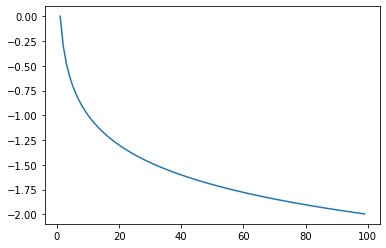

In [146]:
import seaborn as sns 
x = list(range(-100,100))
del x[100]

y= [np.log10(1/i) for i in x]

sns.lineplot(x,y)

In [ ]:
x = range(-10,10)
y= [np.log10(1/(1+i)) for i in x]

sns.lineplot(x,y)

In [144]:
i = list(range(-10,10))
del i[10]

i 

[-10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 1, 2, 3, 4, 5, 6, 7, 8, 9]